Анализ и обработка датасета [Human Actions In Shop Recognition ](https://universe.roboflow.com/cpm/human-action-shop/dataset/6)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
archive_path = '/content/drive/MyDrive/human-action-shop.zip'
output_dir_path = '/content/drive/MyDrive/my_data'
!unzip '/content/drive/MyDrive/human-action-shop.zip' -d '/content/drive/MyDrive/my_data'

# with zipfile.ZipFile(archive_path, 'r') as zip_ref:
#     zip_ref.extractall()

Archive:  /content/drive/MyDrive/human-action-shop.zip
 extracting: /content/drive/MyDrive/my_data/README.dataset.txt  
 extracting: /content/drive/MyDrive/my_data/README.roboflow.txt  
   creating: /content/drive/MyDrive/my_data/test/
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-12-01_25_jpg.rf.a0aca14e1a1cad2bbb657b5111aa9900.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-12-01_28_jpg.rf.30a7635775fc7dd9e2d71747da76d065.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-12-01_32_jpg.rf.1a90e439353d71884b4c68a9228f5d8f.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-12-32_23_jpg.rf.b4c05fb142b110997f822936bc2dbcac.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-13-56_34_jpg.rf.af9bee91a59a13c83950d45a49ba48e9.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05-14_12-13-56_35_jpg.rf.d7bfb6334a4e9879d5b67d6ee2d93b87.jpg  
 extracting: /content/drive/MyDrive/my_data/test/2024-05

In [36]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/my_data/train/_classes.csv')
test = pd.read_csv('/content/drive/MyDrive/my_data/test/_classes.csv')
valid = pd.read_csv('/content/drive/MyDrive/my_data/valid/_classes.csv')
list_data = [train, test, valid]
data = pd.concat(list_data)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 500
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      2528 non-null   object
 1    Normal       2528 non-null   int64 
 2    Pickup       2528 non-null   int64 
 3    Shoplifters  2528 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 98.8+ KB


In [38]:
data.sample(20)

,filename,Normal,Pickup,Shoplifters
692,2024-05-14_12-30-11_182_jpg.rf.08f4e434b768e32...,0,1,0
536,2024-05-14_13-22-59_jpegs000027_jpg.rf.b37a7f3...,0,1,0
1189,2024-05-14_12-49-28_Screenshot-2567-05-16-at-1...,0,1,0
54,2024-05-14_13-41-34_jpegs000020_jpg.rf.4160f89...,0,1,0
50,2024-05-14_13-05-43_Screenshot-2567-05-16-at-1...,0,1,0
695,2024-05-14_13-41-34_jpegs000287_1_jpg.rf.6aec4...,1,0,0
195,2024-05-14_12-35-15_jpegs000037-_jpg.rf.c30a07...,1,0,0
1432,2024-05-14_12-13-56_25_jpg.rf.19af3e441f7a3874...,0,0,1
124,2024-05-14_13-29-04_jpegs000276_jpg.rf.4ad0167...,1,0,0
595,2024-05-14_12-41-21_jpegs000218_jpg.rf.b911caa...,1,0,0


In [23]:
train.columns

Index(['filename', ' Normal', ' Pickup', ' Shoplifters'], dtype='object')

In [24]:
train_dummy = train.loc[:,[' Normal', ' Pickup', ' Shoplifters']]
data_2 = pd.from_dummies(train_dummy)
data_2

ValueError: Dummy DataFrame contains multi-assignment(s); First instance in row: 14

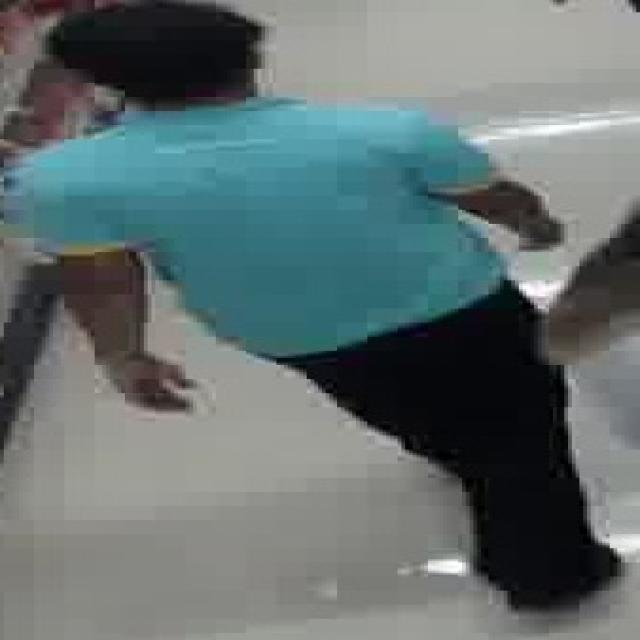

In [50]:
from PIL import Image
import os
im_sample_path = '/content/drive/MyDrive/my_data/train/2024-05-14_13-36-11_jpegs000213_1_jpg.rf.390d8c09ca5f085aa71e9ffc510b2a2c.jpg'
im = Image.open(im_sample_path)
im

In [47]:
import os.path
os.path.isdir('/content/drive/MyDrive/my_data/train')
os.path.isfile(im_sample_path)

True

In [27]:
train.iloc[14,0]

'2024-05-14_13-36-11_jpegs000213_1_jpg.rf.390d8c09ca5f085aa71e9ffc510b2a2c.jpg'

In [34]:
train.head(15)

,filename,Normal,Pickup,Shoplifters
0,2024-05-14_12-21-02_80_jpg.rf.3a3788d59d2c6cf6...,0,1,0
1,2024-05-14_13-03-41_jpegs000165_jpg.rf.393be2f...,0,1,0
2,2024-05-14_12-45-24_Screenshot-2567-05-16-at-1...,1,0,0
3,2024-05-14_12-12-01_10_jpg.rf.3b1c00f9b66f80dd...,0,1,0
4,2024-05-14_12-31-11_184_jpg.rf.3b7fba870b2991f...,1,0,0
5,2024-05-14_12-57-35_jpegs000002_jpg.rf.3b4ddfc...,1,0,0
6,2024-05-14_13-28-04_jpegs000262_jpg.rf.39808fc...,0,0,1
7,2024-05-14_13-32-07_jpegs000111_jpg.rf.3af6666...,0,1,0
8,2024-05-14_13-16-53_jpegs000116_jpg.rf.3b73c7f...,0,1,0
9,2024-05-14_13-39-33_jpegs000014_1_jpg.rf.3a05c...,0,1,0


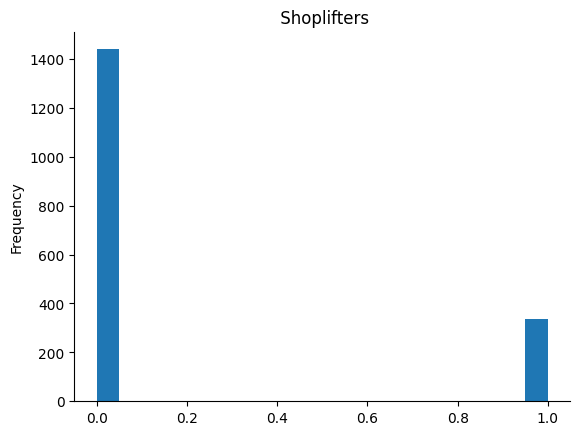

In [53]:
# @title  Shoplifters

from matplotlib import pyplot as plt
train[' Shoplifters'].plot(kind='hist', bins=20, title=' Shoplifters')
plt.gca().spines[['top', 'right',]].set_visible(False)

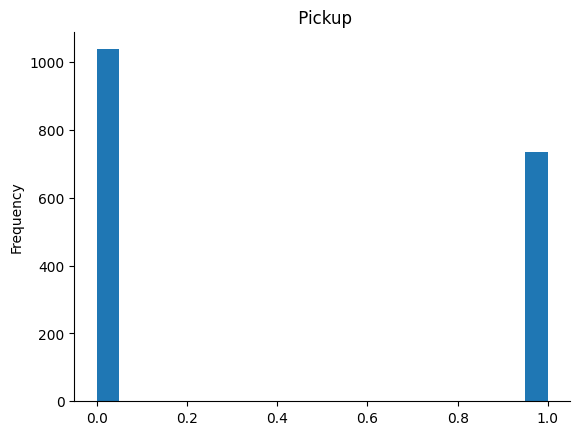

In [52]:
# @title  Pickup

from matplotlib import pyplot as plt
train[' Pickup'].plot(kind='hist', bins=20, title=' Pickup')
plt.gca().spines[['top', 'right',]].set_visible(False)

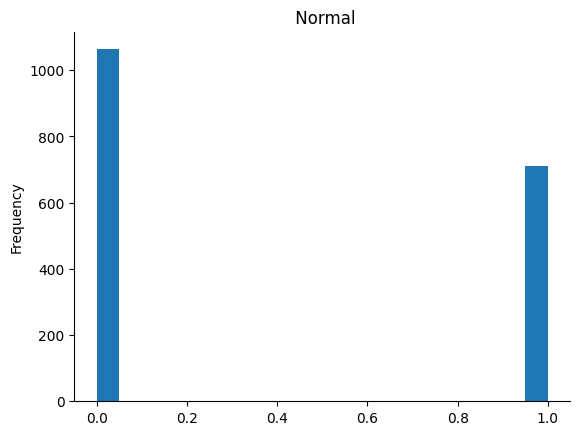

In [51]:
# @title  Normal

from matplotlib import pyplot as plt
train[' Normal'].plot(kind='hist', bins=20, title=' Normal')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
pickup_data.head(5)

,filename,label
0,2024-05-14_12-21-02_80_jpg.rf.3a3788d59d2c6cf6...,1
1,2024-05-14_13-03-41_jpegs000165_jpg.rf.393be2f...,1
2,2024-05-14_12-45-24_Screenshot-2567-05-16-at-1...,0
3,2024-05-14_12-12-01_10_jpg.rf.3b1c00f9b66f80dd...,1
4,2024-05-14_12-31-11_184_jpg.rf.3b7fba870b2991f...,0


In [120]:
pickup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 500
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2528 non-null   object
 1   label     2528 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.2+ KB


In [61]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [62]:
import cv2
from ultralytics import YOLO
from tqdm import tqdm

In [66]:
model = YOLO('yolov8l.pt')
model.fuse()

100%|██████████| 83.7M/83.7M [00:00<00:00, 270MB/s]


YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs


In [78]:
results = model.track(im_sample_path, iou=0.4, conf=0.25, persist=True, imgsz=608, verbose=False, tracker="bytetrack.yaml", classes=0)

In [ ]:
boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
ids = results[0].boxes.id.cpu().numpy().astype(int)

In [76]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [105]:
import cv2
import matplotlib.pyplot as plt

def detect_person(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = model.track(image_rgb, iou=0.4, conf=0.25, persist=True, imgsz=608, verbose=False, tracker="bytetrack.yaml", classes=0)
  if results[0].boxes.id is not None:
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    ids = results[0].boxes.id.cpu().numpy().astype(int)
    for box, id in zip(boxes, ids):
      x_min, y_min, x_max, y_max = box
      color = (0, 255, 255)
      cv2.rectangle(image_rgb, (box[0], box[1]), (box[2], box[3]), color, 2)
      cv2.putText(
          image_rgb,
          f"Id {id}",
          (box[0], box[1]),
          cv2.FONT_HERSHEY_SIMPLEX,
          0.70,
          (0, 255, 255),
          2,
      )
      #plt.imshow(image_rgb)
      #plt.axis('off')
      #plt.show()
  else:
    return 0

In [82]:
detect_person(im_sample_path)

no person


In [85]:
import os
import glob
def collect_jpg_files(directory):
    jpg_files = []
    for root, dirs, files in os.walk(directory):
        for file in glob.glob(os.path.join(root, '*.jpg')):
            jpg_files.append(file)

    return jpg_files

directory = '/content/drive/MyDrive/my_data'

frames = collect_jpg_files(directory)

In [106]:
from tqdm import tqdm
missed = 0
frames_valid = []
for i in tqdm(range((2528))):
  pth = frames[i]
  if detect_person(pth) == 0:
    missed += 1
  else:
    frames_valid.append(frames[i])
missed

100%|██████████| 2528/2528 [2:07:41<00:00,  3.03s/it]


2122

In [96]:
len(frames)

2528

In [111]:
len(frames_valid)

406

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 500
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      2528 non-null   object
 1    Normal       2528 non-null   int64 
 2    Pickup       2528 non-null   int64 
 3    Shoplifters  2528 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 98.8+ KB


In [124]:
frames_valid[0]

'/content/drive/MyDrive/my_data/test/2024-05-14_12-12-01_32_jpg.rf.1a90e439353d71884b4c68a9228f5d8f.jpg'

In [135]:
result_frames = []
for frame in frames_valid:
  frame_name = os.path.splitext(os.path.basename(frame))
  res_frame = ''.join(frame_name)
  result_frames.append(res_frame)
len(result_frames)

406

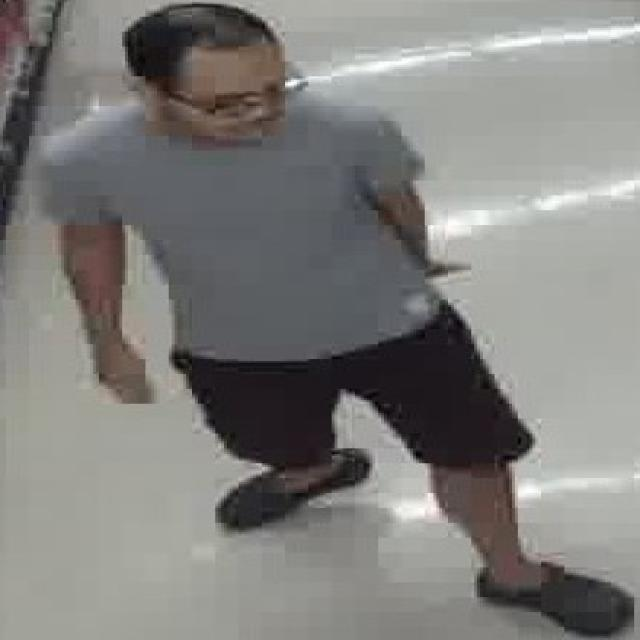

In [117]:
im = Image.open(frames_valid[100])
im

In [136]:
filtered_data = data[data['filename'].isin(result_frames)]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 2 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      406 non-null    object
 1    Normal       406 non-null    int64 
 2    Pickup       406 non-null    int64 
 3    Shoplifters  406 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB


In [137]:
filtered_data

,filename,Normal,Pickup,Shoplifters
2,2024-05-14_12-45-24_Screenshot-2567-05-16-at-1...,1,0,0
7,2024-05-14_13-32-07_jpegs000111_jpg.rf.3af6666...,0,1,0
8,2024-05-14_13-16-53_jpegs000116_jpg.rf.3b73c7f...,0,1,0
13,2024-05-14_12-50-29_Screenshot-2567-05-16-at-1...,0,0,1
21,2024-05-14_12-36-16_jpegs000075-_jpg.rf.3b9fcd...,0,1,0
...,...,...,...,...
452,2024-05-14_13-18-55_jpegs000079_jpg.rf.e550fe5...,0,1,0
456,2024-05-14_12-56-34_Screenshot-2567-05-15-at-1...,0,1,0
462,2024-05-14_12-44-24_Screenshot-2567-05-16-at-1...,1,0,0
470,2024-05-14_12-41-21_jpegs000101_jpg.rf.f42680a...,0,1,0


In [138]:
pickup_data = filtered_data.loc[:,['filename', ' Pickup']]
pickup_data.rename(columns={' Pickup':'label'}, inplace=True)
pickup_data.head(5)

,filename,label
2,2024-05-14_12-45-24_Screenshot-2567-05-16-at-1...,0
7,2024-05-14_13-32-07_jpegs000111_jpg.rf.3af6666...,1
8,2024-05-14_13-16-53_jpegs000116_jpg.rf.3b73c7f...,1
13,2024-05-14_12-50-29_Screenshot-2567-05-16-at-1...,0
21,2024-05-14_12-36-16_jpegs000075-_jpg.rf.3b9fcd...,1
...,...,...
452,2024-05-14_13-18-55_jpegs000079_jpg.rf.e550fe5...,1
456,2024-05-14_12-56-34_Screenshot-2567-05-15-at-1...,1
462,2024-05-14_12-44-24_Screenshot-2567-05-16-at-1...,0
470,2024-05-14_12-41-21_jpegs000101_jpg.rf.f42680a...,1


In [141]:
pickup_data_raw = data.loc[:,['filename', ' Pickup']]
pickup_data_raw.rename(columns={' Pickup':'label'}, inplace=True)

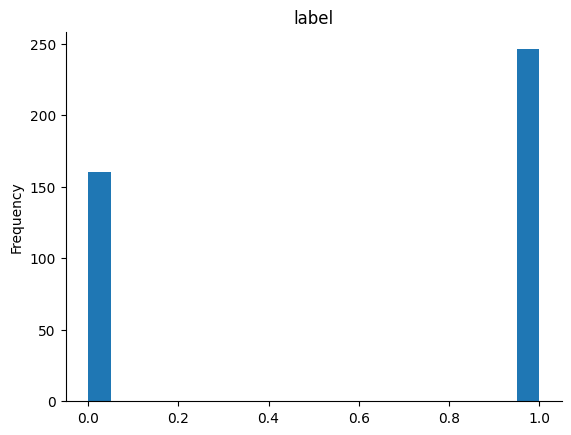

In [139]:
# @title label

from matplotlib import pyplot as plt
pickup_data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [142]:
pickup_data.to_csv('/content/drive/MyDrive/my_data/metadata_filtered_pickup.csv', index = False)
pickup_data_raw.to_csv('/content/drive/MyDrive/my_data/metadata_pickup.csv', index = False)